In [1]:
import sys
import time
import numpy as np

from functools import lru_cache

sys.setrecursionlimit(1000000)

# 雙蛋問題

    如欲取得 2 顆雞蛋，100 層樓層時的臨界樓層，我們有哪些方式可以取得呢？
    
* 方式
    * 二分法
    * 每十層扔 1 次
    * 遞迴
    * 動態規劃

### 一顆雞蛋

* 條件
    * 雞蛋數 1 顆
    * 樓層數 100 層
    
* 說明    
    * 當只有一顆雞蛋時，因要取得雞蛋破掉的臨界樓層，故無法利用如『 二分法 』、『 遞歸 』等作法去解決
    * 此時作法只有一個就是由下往上一層一層扔雞蛋以取得雞蛋破掉的臨界樓層
    
* 結論
    * 一顆雞蛋不論有幾層樓，最差扔蛋次數為『 總樓層數 』

### 二分法

* <p style="color:blue">案例一</p>

    * 條件
        * 雞蛋數 無限
        * 樓層數 100 層
        
    * 說明
        * 每次的計算方式都是除以二，如
            * 先到 50 層扔一次雞蛋
                * 破時，臨界樓層在於 1 ~ 49 層，這時再到 25 層去扔蛋一次
                * 沒破時，臨界樓層在於 51 ~ 100 層，這時再到 75 層去扔蛋一次

    * 算法
        * 2^k >= 100
        * k -> log2 100 = 6.64

    * 結論
        * 此種做法最差要扔 7 次蛋
        
    * <p style="color:red">此次的條件限制在 2 顆雞蛋，因此案例一的做法不可採用</p>

In [2]:
def dichotomy(floor):
   return np.log2(floor)

dichotomy(100)

6.643856189774724

* <p style="color:blue">案例二</p>
    
    * 條件
        * 雞蛋數 2 顆
        * 樓層數 100 層
        
    * 說明
        * 先到 50 層去扔一次雞蛋
            * 蛋破時，臨界樓層在於 1 ~ 49 層
                * 因只剩下 1 顆雞蛋，故需由下往上一層一層扔雞蛋以取得雞蛋破掉的臨界樓層
                * 如果是在第 49 層才碎，那麼最差情況下還要再扔 49 次
                * 總計最差 50 次
            * 蛋沒破時，臨界樓層在於 51 ~ 100 層，這時再到 75 層去扔蛋
                * 最差情況下還要再扔 24 次
                * 再加上 50 層、75 層各一次
                * 故總計最差 26 次
    * 結論
        * 此種做法最差要扔 50 次蛋

### 每十層扔 1 次

* 條件
    * 雞蛋數 2 顆
    * 樓層數 100 層

* 說明
    * 先到 10 層去扔一次
        * 蛋破時，臨界樓層在於 1 ~ 9 層
            * 因只剩下 1 顆雞蛋，故需由下往上一層一層扔雞蛋以取得雞蛋破掉的臨界樓層
            * 如果是在第 9 層才碎，那麼最差情況下還要再扔 9 次
            * 故總計最差 10 次
        * 蛋沒破時，臨界樓層在於 11 ~ 100 層，這時再到 20 層去扔蛋
* 結論
    * 假如臨界樓層在 100 層那麼計算方式是 1 ~ 10 層一次加上 11 ~ 20 層一次......91 ~ 100 層一次再加上 91 ~ 99 層 9 次，總計 19 次
    * 故此種做法最差要扔 19 次蛋

### 那麼來看看我們的問題，假設有 F 層樓 N 個雞蛋時，那麼我們要如何計算出扔蛋次數？

* 邏輯架構設計說明

    * 第一部份
    
        |樓層數|雞蛋數|扔蛋次數|
        |:--:|:--:|:--:|
        |無須考慮|1|總樓層數|
        |0|無須考慮|0|
        |1|至少 1 顆|1|
        
    * 第二部分
        * 當在 K 樓層扔蛋時，會有兩個情況發生
            * 蛋破
                * 就說明臨界樓層在 K 層以下。
                * 但是此時，我們只剩下 1 顆雞蛋，最壞的情況下還要扔 K − 1 次才能找到臨界樓層。
            * 蛋沒破
                * 就說明臨界樓層在 K 層以上。
                * 此時我們還有 2 顆雞蛋，還剩下 F − K 層樓需要扔，那麼最壞的情況下，還需要檢測 F − K 次。

#### 遞迴

In [3]:
@lru_cache(maxsize = None)
def dynamicProgramming(totalFloor, totalEggs):
    
    if totalFloor == 0 or totalEggs == 0:
        return 0
    
    if totalEggs == 1:
        return totalFloor

    if totalFloor == 1:
        return totalFloor

    min = sys.maxsize

    for currentFloor in range(1, totalFloor + 1):
        res = max(dynamicProgramming(currentFloor - 1, totalEggs - 1), dynamicProgramming(totalFloor - currentFloor, totalEggs))

        if res < min:
            min = res

    return min + 1     # 因為需加上第一次扔蛋的次數

start = time.time()
print('扔蛋次數: ', dynamicProgramming(100, 2), '次')
end = time.time()
print('花費時間: ', end-start, '秒')

扔蛋次數:  14 次
花費時間:  0.003290891647338867 秒


#### 動態規劃

* 動態規劃的三個特徵
    * 適用於最優解問題
    * 有大量的重複子問題
    * 子問題之間有依賴（不獨立）
    
* 與遞迴的關係：
    * 這些重複的子問題，DP演算法將其結果用一維或二維陣列（鄰接矩陣）儲存下來，等下一次又要計算該子問題時，直接用已計算好的
    * 而遞迴卻不是這樣，它會一遍又一遍地計算這些重複的子問題，從而效率狂降。子問題重複率較高的遞迴演算法可改寫成動態規劃，但不是所有遞迴演算法都適合改成動態規劃。

In [4]:
INT_MAX = 32767
  
def eggDrop(totalEggs, totalFloors):
    
    # 先建立一個 totalEggs * totalFloors 的二維陣列
    
    eggFloors = [[0 for x in range(totalFloors + 1)] for x in range(totalEggs + 1)] 
#     eggFloors = np.zeros((totalEggs + 1, totalFloors + 1))
    
    if totalEggs == 0 or totalFloors == 0:
        return 0
    
    # 無論有幾層，樓層一都只需扔一次
    
    for i in range(1, totalEggs + 1): 
        eggFloors[i][0] = 0
        eggFloors[i][1] = 1
    
    # 一顆雞蛋時，有幾層，就要扔幾次
    
    for j in range(1, totalFloors + 1): 
        eggFloors[1][j] = j
        
    # 將剩餘狀態寫入 eggFloor 中
        
    for egg in range(2, totalEggs + 1): 
        for floor in range(2, totalFloors + 1): 
            eggFloors[egg][floor] = INT_MAX 
            for currentFloor in range(1, floor + 1): 
                
                # 從 eggFloors 取值
                
                res = 1 + max(eggFloors[egg - 1][currentFloor - 1], eggFloors[egg][floor - currentFloor]) 
                
                # 是否比原值小，有的話覆蓋
                
                if res < eggFloors[egg][floor]: 
                    eggFloors[egg][floor] = res 
                    
    # 回傳結果
           
    return eggFloors[totalEggs][totalFloors] 
  
totalEggs = 2
totalFloors = 100

start = time.time()
print("Minimum number of trials in worst case with", str(totalEggs), "eggs and ", str(totalFloors), " floors is ", str(eggDrop(totalEggs, totalFloors))) 
end = time.time()
print('花費時間: ', end-start, '秒')

Minimum number of trials in worst case with 2 eggs and  100  floors is  14
花費時間:  0.0031557083129882812 秒


## 答案表
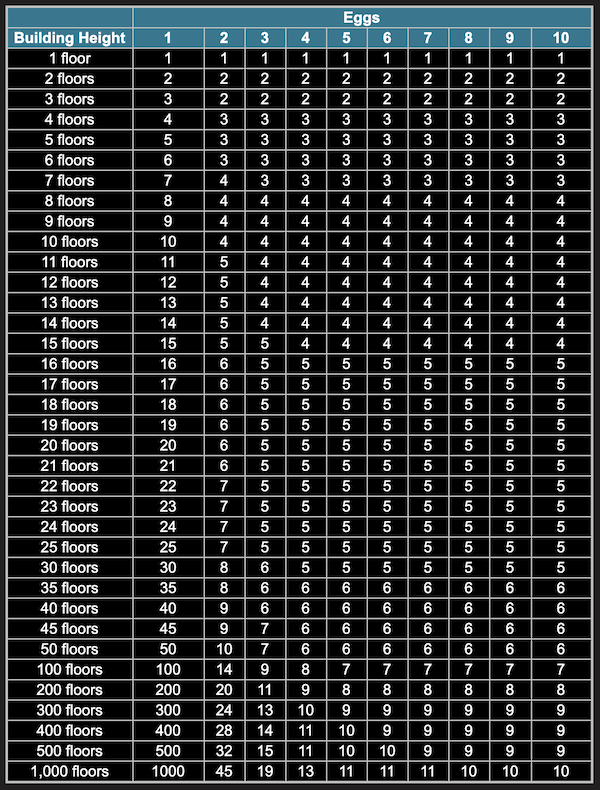